# UltraLeap import playground

Notebook status 20.09.2022

In [1]:
# Import public packages and functions
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from itertools import compress
from scipy.spatial import distance
#from scipy import signal
from scipy.ndimage import uniform_filter1d
import math
from scipy.signal import find_peaks
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import statsmodels.api as sm


In [2]:
# Import own functions
import import_data.import_unity_positions as import_unity
import import_data.import_and_convert_data as import_dat
# import sig_processing.select_data as select_data

import movement_calc.calc_3d_distances as calc_3d
import movement_calc.helpfunctions as hp

### Define Data directories and Find files in directories

In [3]:
importlib.reload(import_dat)
importlib.reload(hp)
# Find common relative path and directory structure
# proj_dir = import_unity.find_project_dir(os.getcwd())
dir = 'C:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\Patientdata'
dir


'C:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\Patientdata'

### VR Position

In [4]:
data_dir_VR = os.path.join(dir, 'Percept_sub030\\12mfu\\VR')
data_dir_VR
files_VR = os.listdir(os.path.join(data_dir_VR,'sub030_12mfu_M1S0_VR_updrs'))

for f in files_VR:

    if 'rh' in f:

        df_raw_VR_r = import_dat.import_string_data(
            file_path = os.path.join(data_dir_VR, 'sub030_12mfu_M1S0_VR_updrs', f)
        )

    if 'lh' in f:
        df_raw_VR_l = import_dat.import_string_data(
            file_path = os.path.join(data_dir_VR, 'sub030_12mfu_M1S0_VR_updrs', f)
        )
clean_df_VR_r = import_dat.remove_double_and_onlyNan_rows(df_raw_VR_r)
clean_df_VR_l = import_dat.remove_double_and_onlyNan_rows(df_raw_VR_l)

In [5]:
clean_df_VR_r.head()

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,10:45:37:2668,208.5133,0.0167,0.2801,-0.0677,-0.2335,0.2653,-0.0793,-0.2083,0.2562,...,-0.0988,-0.1548,0.2611,-0.0956,-0.1644,1735.0,0.0,1411.44,0.0,1.0
1,10:45:37:2706,208.5170,0.0166,0.2784,-0.0642,-0.2289,0.2636,-0.0755,-0.2037,0.2545,...,-0.0949,-0.1502,0.2600,-0.0917,-0.1597,1858.0,0.0,1366.44,0.0,1.0
2,10:45:37:2878,208.5343,0.0166,0.2778,-0.0611,-0.2245,0.2628,-0.0719,-0.1994,0.2536,...,-0.0907,-0.1455,0.2596,-0.0880,-0.1551,7138.0,0.0,1416.43,0.0,1.0
3,10:45:37:3040,208.5505,0.0167,0.2766,-0.0552,-0.2176,0.2622,-0.0657,-0.1924,0.2533,...,-0.0836,-0.1386,0.2589,-0.0809,-0.1480,1544.0,0.0,1423.44,0.0,1.0
4,10:45:37:3209,208.5674,0.0166,0.2756,-0.0474,-0.2095,0.2609,-0.0578,-0.1841,0.2516,...,-0.0750,-0.1296,0.2579,-0.0730,-0.1392,445.0,0.0,959.45,0.0,1.0


In [6]:
clean_df_VR_l.head()

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,10:46:04:1593,235.4058,0.0167,-0.1611,-0.1909,-0.2440,-0.1403,-0.2015,-0.2230,-0.1253,...,-0.2309,-0.1775,-0.1273,-0.2303,-0.1901,6200.0,0.0,6537.23,0.0,1.0
1,10:46:04:1760,235.4225,0.0166,-0.1604,-0.1789,-0.2262,-0.1392,-0.1879,-0.2043,-0.1238,...,-0.2156,-0.1583,-0.1265,-0.2149,-0.1705,5316.0,0.0,6977.22,0.0,1.0
2,10:46:04:1928,235.4392,0.0166,-0.1599,-0.1743,-0.2180,-0.1386,-0.1824,-0.1959,-0.1232,...,-0.2096,-0.1502,-0.1262,-0.2089,-0.1620,9478.0,0.0,7153.21,0.0,1.0
3,10:46:04:2087,235.4551,0.0166,-0.1589,-0.1647,-0.2020,-0.1374,-0.1720,-0.1798,-0.1217,...,-0.1977,-0.1345,-0.1252,-0.1963,-0.1452,6618.0,0.0,7187.22,0.0,1.0
4,10:46:04:2256,235.4721,0.0166,-0.1581,-0.1589,-0.1948,-0.1366,-0.1660,-0.1725,-0.1207,...,-0.1913,-0.1272,-0.1246,-0.1897,-0.1378,591.0,0.0,6880.24,0.0,1.0


Text(0, 0.5, 'index_tip_x')

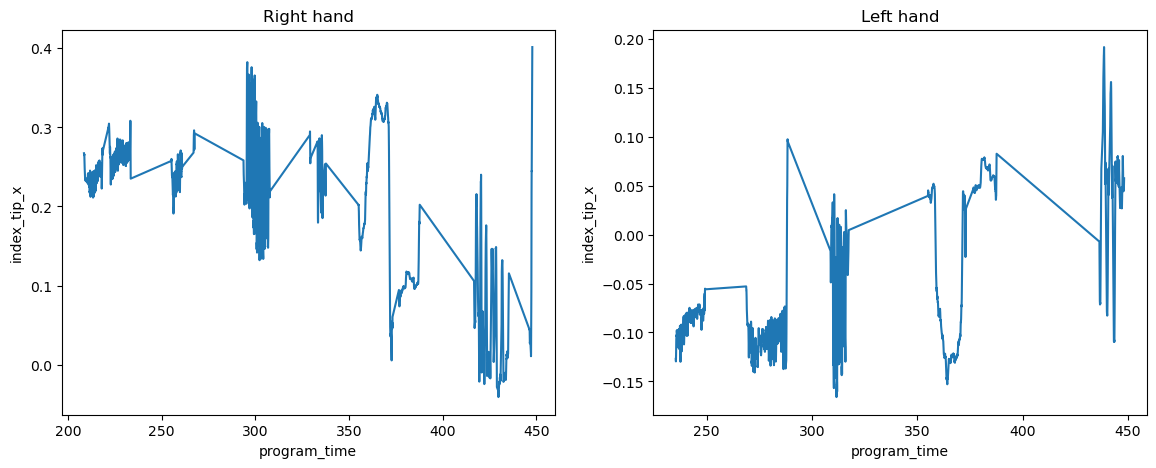

In [7]:
fig,axes = plt.subplots(1, 2, figsize = (14,5))

axes[0].plot(
    clean_df_VR_r['program_time'],
    clean_df_VR_r['index_tip_x']
)
axes[0].set_title('Right hand')
axes[0].set_xlabel('program_time')
axes[0].set_ylabel('index_tip_x')

axes[1].plot(
    clean_df_VR_l['program_time'],
    clean_df_VR_l['index_tip_x']
)
axes[1].set_title('Left hand')
axes[1].set_xlabel('program_time')
axes[1].set_ylabel('index_tip_x')


### Division of data per task

In [8]:
def task(df,time1,time2):

    new_df = df[(df['global_time']>=time1) & (df['global_time']<=time2)]

    return new_df

# Fingertapping

Creating FT dataframe

In [9]:
FT_r1 = task(
    clean_df_VR_r,
    '10:45:37',
    '10:45:50'
    )
FT_r1

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,10:45:37:2668,208.5133,0.0167,0.2801,-0.0677,-0.2335,0.2653,-0.0793,-0.2083,0.2562,...,-0.0988,-0.1548,0.2611,-0.0956,-0.1644,1735.0,0.0,1411.44,0.00,1.0
1,10:45:37:2706,208.5170,0.0166,0.2784,-0.0642,-0.2289,0.2636,-0.0755,-0.2037,0.2545,...,-0.0949,-0.1502,0.2600,-0.0917,-0.1597,1858.0,0.0,1366.44,0.00,1.0
2,10:45:37:2878,208.5343,0.0166,0.2778,-0.0611,-0.2245,0.2628,-0.0719,-0.1994,0.2536,...,-0.0907,-0.1455,0.2596,-0.0880,-0.1551,7138.0,0.0,1416.43,0.00,1.0
3,10:45:37:3040,208.5505,0.0167,0.2766,-0.0552,-0.2176,0.2622,-0.0657,-0.1924,0.2533,...,-0.0836,-0.1386,0.2589,-0.0809,-0.1480,1544.0,0.0,1423.44,0.00,1.0
4,10:45:37:3209,208.5674,0.0166,0.2756,-0.0474,-0.2095,0.2609,-0.0578,-0.1841,0.2516,...,-0.0750,-0.1296,0.2579,-0.0730,-0.1392,445.0,0.0,959.45,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,10:45:47:2823,218.5288,0.0166,0.2808,-0.2840,-0.4544,0.2585,-0.2966,-0.4347,0.2447,...,-0.3298,-0.3911,0.2608,-0.3297,-0.3994,2173.0,0.0,1386.44,0.02,1.0
601,10:45:47:3002,218.5467,0.0166,0.2878,-0.2961,-0.4754,0.2646,-0.3096,-0.4558,0.2495,...,-0.3421,-0.4103,0.2645,-0.3436,-0.4223,1052.0,0.0,2066.44,0.00,1.0
602,10:45:47:3168,218.5632,0.0166,0.2898,-0.3018,-0.4854,0.2671,-0.3163,-0.4660,0.2528,...,-0.3494,-0.4205,0.2672,-0.3501,-0.4329,2439.0,0.0,2796.44,0.00,1.0
603,10:45:47:3329,218.5794,0.0167,0.2936,-0.3054,-0.5027,0.2709,-0.3218,-0.4847,0.2571,...,-0.3561,-0.4407,0.2700,-0.3552,-0.4526,2150.0,0.0,3895.43,0.00,1.0


Calculating FT distance

Text(0.5, 1.0, 'FT_r1')

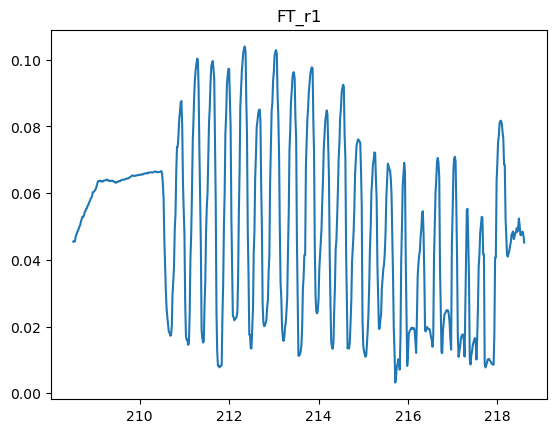

In [10]:
FT_r_amp1 = hp.FT_amp(
    FT_r1,
    'index_tip', 
    'thumb_tip'
    )
FT_r_amp1

plt.plot(
    FT_r_amp1['program_time'],
    FT_r_amp1['distance']
    )
plt.title('FT_r1')

In [11]:
FT_r2 = task(clean_df_VR_r,'10:45:50','10:46:04')
FT_r2

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
605,10:45:50:2816,221.5281,0.0166,0.3104,-0.1134,-0.2920,0.2957,-0.1213,-0.2653,0.2871,...,-0.1411,-0.2128,0.2910,-0.1385,-0.2232,8012.0,0.0,3928.34,0.0,1.0
606,10:45:50:2983,221.5447,0.0167,0.3100,-0.1140,-0.2857,0.2964,-0.1219,-0.2588,0.2890,...,-0.1399,-0.2064,0.2920,-0.1381,-0.2168,2859.0,0.0,3473.36,0.0,1.0
607,10:45:50:3158,221.5623,0.0166,0.3104,-0.1106,-0.2821,0.2972,-0.1186,-0.2553,0.2898,...,-0.1370,-0.2031,0.2931,-0.1350,-0.2131,9946.0,0.0,3505.35,0.0,1.0
608,10:45:50:3324,221.5789,0.0166,0.3100,-0.1008,-0.2736,0.2973,-0.1095,-0.2466,0.2905,...,-0.1286,-0.1942,0.2937,-0.1260,-0.2040,6402.0,0.0,3796.35,0.0,1.0
609,10:45:50:3487,221.5951,0.0166,0.3089,-0.0952,-0.2682,0.2963,-0.1038,-0.2413,0.2894,...,-0.1230,-0.1889,0.2929,-0.1203,-0.1985,851.0,0.0,4016.35,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,10:46:02:1428,233.3893,0.0167,0.2618,-0.1747,-0.3450,0.2472,-0.1870,-0.3195,0.2382,...,-0.2181,-0.2706,0.2520,-0.2170,-0.2810,676.0,0.0,1577.41,0.0,1.0
1311,10:46:02:1601,233.4066,0.0166,0.2575,-0.1865,-0.3589,0.2421,-0.1987,-0.3349,0.2327,...,-0.2315,-0.2879,0.2473,-0.2304,-0.2971,1358.0,0.0,1560.41,0.0,1.0
1312,10:46:02:1762,233.4227,0.0166,0.2538,-0.2114,-0.3892,0.2353,-0.2228,-0.3654,0.2231,...,-0.2576,-0.3206,0.2392,-0.2583,-0.3317,7186.0,0.0,1717.40,0.0,1.0
1313,10:46:02:1937,233.4402,0.0167,0.2529,-0.2250,-0.4035,0.2333,-0.2359,-0.3804,0.2204,...,-0.2713,-0.3369,0.2372,-0.2723,-0.3475,5259.0,0.0,1576.41,0.0,1.0


In [12]:
FT_l2 = task(clean_df_VR_l,'10:46:04','10:46:21')
FT_l2

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,10:46:04:1593,235.4058,0.0167,-0.1611,-0.1909,-0.2440,-0.1403,-0.2015,-0.2230,-0.1253,...,-0.2309,-0.1775,-0.1273,-0.2303,-0.1901,6200.0,0.0,6537.23,0.00,1.0
1,10:46:04:1760,235.4225,0.0166,-0.1604,-0.1789,-0.2262,-0.1392,-0.1879,-0.2043,-0.1238,...,-0.2156,-0.1583,-0.1265,-0.2149,-0.1705,5316.0,0.0,6977.22,0.00,1.0
2,10:46:04:1928,235.4392,0.0166,-0.1599,-0.1743,-0.2180,-0.1386,-0.1824,-0.1959,-0.1232,...,-0.2096,-0.1502,-0.1262,-0.2089,-0.1620,9478.0,0.0,7153.21,0.00,1.0
3,10:46:04:2087,235.4551,0.0166,-0.1589,-0.1647,-0.2020,-0.1374,-0.1720,-0.1798,-0.1217,...,-0.1977,-0.1345,-0.1252,-0.1963,-0.1452,6618.0,0.0,7187.22,0.00,1.0
4,10:46:04:2256,235.4721,0.0166,-0.1581,-0.1589,-0.1948,-0.1366,-0.1660,-0.1725,-0.1207,...,-0.1913,-0.1272,-0.1246,-0.1897,-0.1378,591.0,0.0,6880.24,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,10:46:18:0024,249.2488,0.0166,-0.1197,-0.2982,-0.4255,-0.0918,-0.3079,-0.4064,-0.0725,...,-0.3459,-0.3684,-0.0690,-0.3420,-0.3751,2904.0,0.0,7383.33,0.10,1.0
827,10:46:18:0201,249.2666,0.0166,-0.1227,-0.3127,-0.4533,-0.0939,-0.3205,-0.4340,-0.0734,...,-0.3561,-0.3941,-0.0697,-0.3536,-0.4027,8128.0,0.0,6648.31,0.13,1.0
828,10:46:18:0363,249.2827,0.0167,-0.1233,-0.3237,-0.4650,-0.0937,-0.3302,-0.4463,-0.0717,...,-0.3626,-0.4053,-0.0689,-0.3612,-0.4144,616.0,0.0,6636.33,0.13,1.0
829,10:46:18:0536,249.3001,0.0166,-0.1241,-0.3457,-0.4825,-0.0933,-0.3487,-0.4637,-0.0695,...,-0.3746,-0.4188,-0.0673,-0.3763,-0.4298,25.0,0.0,6331.38,0.00,1.0


In [13]:
FT_r_amp2 = hp.FT_amp(
    FT_r2,
    'index_tip', 
    'thumb_tip'
    )
FT_r_amp2

,program_time,distance
0,221.5281,0.037033
1,221.5447,0.038407
2,221.5623,0.037992
3,221.5789,0.037258
4,221.5951,0.036668
...,...,...
705,233.3893,0.046047
706,233.4066,0.046142
707,233.4227,0.045448
708,233.4402,0.045931


In [14]:
FT_l_amp2 = hp.FT_amp(
    FT_l2,
    'index_tip', 
    'thumb_tip'
    )
FT_l_amp2

,program_time,distance
0,235.4058,0.028652
1,235.4225,0.027212
2,235.4392,0.026689
3,235.4551,0.026617
4,235.4721,0.027544
...,...,...
826,249.2488,0.035389
827,249.2666,0.035260
828,249.2827,0.035567
829,249.3001,0.041415


Text(0, 0.5, 'distance (m)')

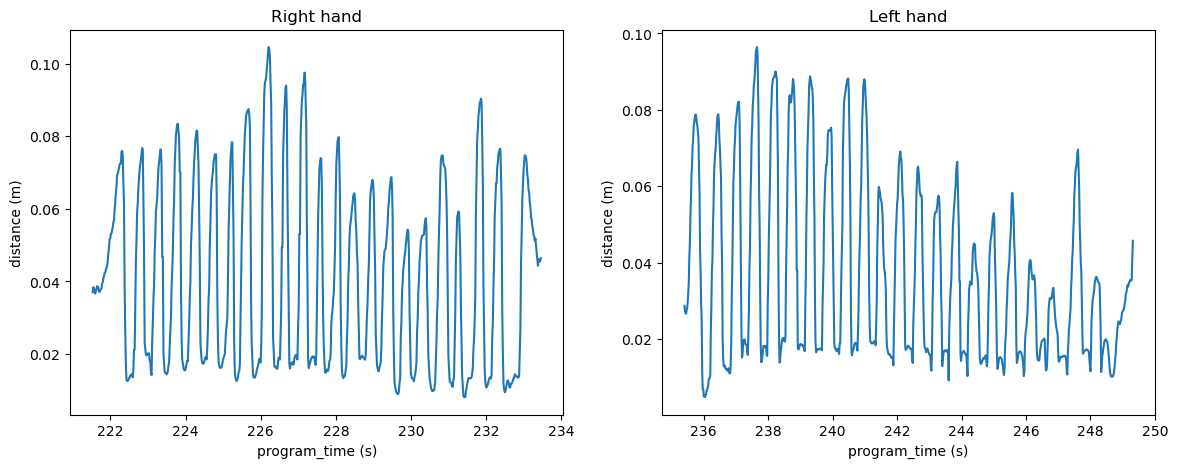

In [15]:
fig,axes = plt.subplots(1, 2, figsize = (14,5))

axes[0].plot(
    FT_r_amp2['program_time'],
    FT_r_amp2['distance']
)
axes[0].set_title('Right hand')
axes[0].set_xlabel('program_time (s)')
axes[0].set_ylabel('distance (m)')

axes[1].plot(
    FT_l_amp2['program_time'],
    FT_l_amp2['distance']
)
axes[1].set_title('Left hand')
axes[1].set_xlabel('program_time (s)')
axes[1].set_ylabel('distance (m)')

In [16]:
max_FT_r_amp2 = np.max(FT_r_amp2['distance'])
max_FT_l_amp2 = np.max(FT_l_amp2['distance'])

mean_FT_r_amp2 = np.mean(FT_r_amp2['distance'])
mean_FT_l_amp2 = np.mean(FT_l_amp2['distance'])

print(f'Maximum FT distance (right side): {max_FT_r_amp2}')
print(f'Maximum FT distance (left side): {max_FT_l_amp2} \n')
print(f'Mean FT distance (right side): {mean_FT_r_amp2}')
print(f'Mean FT distance (left side): {mean_FT_l_amp2}')

Maximum FT distance (right side): 0.10452985219543744
Maximum FT distance (left side): 0.09639974066355157 

Mean FT distance (right side): 0.040980668848190044
Mean FT distance (left side): 0.03677106545717297


Finding Minima and Maxima

In [17]:
importlib.reload(hp)
dict_min_max_FT_r_amp2 = hp.find_min_max(
    FT_r_amp2.reset_index(drop = True),
    15,
    15,
    'distance'
    )

max_idx_FT_r_amp2 = dict_min_max_FT_r_amp2['max_idx'] 
min_idx_FT_r_amp2 = dict_min_max_FT_r_amp2['min_idx']




In [18]:
dict_min_max_FT_l_amp2 = hp.find_min_max(
    FT_l_amp2,
    15,
    15,
    'distance'
    )    

max_idx_FT_l_amp2 = dict_min_max_FT_l_amp2['max_idx'] 
min_idx_FT_l_amp2 = dict_min_max_FT_l_amp2['min_idx']

# Opening-Closing

Creating OC dataframe

In [19]:
OC_r = task(
    clean_df_VR_r,
    '10:46:21',
    '10:46:39'
    )
OC_r

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
1315,10:46:23:9501,255.1966,0.0166,0.2721,-0.0878,-0.2987,0.2538,-0.0886,-0.2721,0.2418,...,-0.1001,-0.2106,0.2502,-0.1056,-0.2222,6834.0,0.0,0.43,0.00,1.0
1316,10:46:23:9676,255.2141,0.0167,0.2721,-0.0864,-0.2969,0.2540,-0.0867,-0.2702,0.2422,...,-0.0971,-0.2086,0.2509,-0.1028,-0.2199,8641.0,0.0,0.43,0.00,1.0
1317,10:46:23:9844,255.2308,0.0169,0.2697,-0.0784,-0.2915,0.2519,-0.0785,-0.2646,0.2403,...,-0.0881,-0.2033,0.2485,-0.0927,-0.2139,635.0,0.0,0.44,0.00,1.0
1318,10:46:24:0001,255.2465,0.0166,0.2682,-0.0737,-0.2886,0.2505,-0.0739,-0.2616,0.2389,...,-0.0835,-0.2003,0.2469,-0.0875,-0.2108,3039.0,0.0,0.44,0.00,1.0
1319,10:46:24:0170,255.2635,0.0166,0.2668,-0.0687,-0.2860,0.2492,-0.0691,-0.2590,0.2379,...,-0.0788,-0.1977,0.2455,-0.0824,-0.2081,3764.0,0.0,0.44,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,10:46:36:2112,267.4577,0.0166,0.2831,-0.2460,-0.4622,0.2673,-0.2548,-0.4350,0.2595,...,-0.2806,-0.3941,0.2735,-0.2775,-0.4016,4952.0,1.0,9252.20,0.25,1.0
1613,10:46:36:2289,267.4754,0.0166,0.2911,-0.2584,-0.4782,0.2750,-0.2710,-0.4520,0.2665,...,-0.3020,-0.4127,0.2792,-0.2989,-0.4228,5344.0,0.0,7559.25,0.04,1.0
1614,10:46:36:2444,267.4908,0.0166,0.2950,-0.2618,-0.4845,0.2787,-0.2757,-0.4588,0.2699,...,-0.3096,-0.4198,0.2811,-0.3069,-0.4317,9406.0,0.0,6271.27,0.00,1.0
1615,10:46:36:2628,267.5093,0.0166,0.3036,-0.2691,-0.4927,0.2876,-0.2852,-0.4686,0.2788,...,-0.3221,-0.4324,0.2866,-0.3191,-0.4445,4685.0,0.0,5519.29,0.00,1.0


In [20]:
importlib.reload(hp)

bla  = hp.OC_amp(OC_r, ['middle_tip','index_tip'])
bla

,program_time,middle_tip_dist,index_tip_dist
0,255.1966,0.102877,0.095755
1,255.2141,0.103729,0.095353
2,255.2308,0.103477,0.095374
3,255.2465,0.103862,0.095534
4,255.2635,0.103692,0.095301
...,...,...,...
297,267.4577,0.047524,0.070024
298,267.4754,0.051484,0.074122
299,267.4908,0.055381,0.076948
300,267.5093,0.062428,0.078019


In [21]:
OC_l = task(
    clean_df_VR_l,
    '10:46:39',
    '10:46:59')
OC_l

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
917,10:46:39:0112,270.2576,0.0166,-0.1206,0.0307,-0.1259,-0.1074,0.0447,-0.0991,-0.0973,...,0.0504,-0.0544,-0.0944,0.0534,-0.0589,8957.0,1.0,9548.11,0.93,1.0
918,10:46:39:0272,270.2736,0.0166,-0.1188,0.0301,-0.1290,-0.1063,0.0451,-0.1022,-0.0971,...,0.0517,-0.0580,-0.0934,0.0544,-0.0622,1448.0,1.0,9023.10,1.00,1.0
919,10:46:39:0438,270.2903,0.0166,-0.1183,0.0301,-0.1310,-0.1060,0.0453,-0.1040,-0.0970,...,0.0521,-0.0597,-0.0931,0.0549,-0.0640,7060.0,1.0,8974.90,1.00,1.0
920,10:46:39:0609,270.3073,0.0166,-0.1179,0.0298,-0.1351,-0.1056,0.0454,-0.1078,-0.0966,...,0.0527,-0.0636,-0.0926,0.0556,-0.0682,2899.0,1.0,8995.90,1.00,1.0
921,10:46:39:0774,270.3239,0.0166,-0.1179,0.0296,-0.1370,-0.1055,0.0453,-0.1097,-0.0964,...,0.0527,-0.0655,-0.0924,0.0557,-0.0703,645.0,1.0,9058.90,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,10:46:57:1853,288.4318,0.0166,0.0041,-0.2954,-0.4315,0.0334,-0.2991,-0.4151,0.0553,...,-0.3280,-0.3687,0.0698,-0.3307,-0.3904,1101.0,0.0,0.39,0.00,1.0
1991,10:46:57:2031,288.4496,0.0167,0.0048,-0.3094,-0.4447,0.0352,-0.3108,-0.4289,0.0594,...,-0.3341,-0.3850,0.0758,-0.3355,-0.4050,5190.0,0.0,0.45,0.00,1.0
1992,10:46:57:2198,288.4663,0.0166,0.0064,-0.3169,-0.4476,0.0370,-0.3156,-0.4306,0.0623,...,-0.3355,-0.3867,0.0792,-0.3379,-0.4067,5164.0,0.0,0.45,0.00,1.0
1993,10:46:57:2358,288.4823,0.0167,0.0082,-0.3275,-0.4497,0.0378,-0.3229,-0.4314,0.0631,...,-0.3384,-0.3884,0.0807,-0.3415,-0.4066,3872.0,0.0,83.35,0.00,1.0


Calculating OC amplitude using only mid finger (r)

In [22]:
importlib.reload(hp)
OC_r_fing_ls = ['middle_tip']
OC_r_amp = hp.OC_amp_fing(
    OC_r,
    'middle_tip', 
    )

In [23]:
OC_l_fing_ls = ['middle_tip']
OC_l_amp = hp.OC_amp_fing(
    OC_l,
    'middle_tip', 
    )

Text(0, 0.5, 'distance (m)')

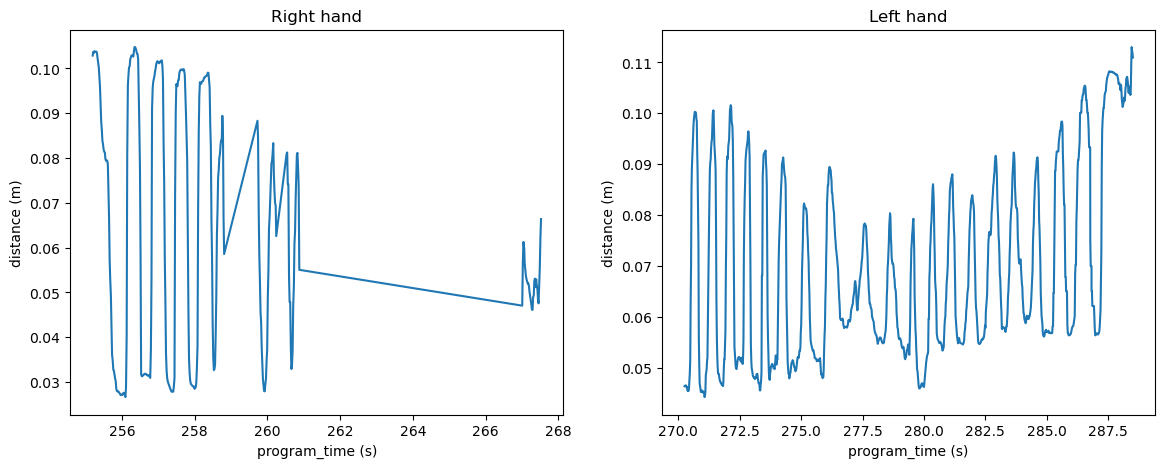

In [24]:
fig,axes = plt.subplots(1, 2, figsize = (14,5))

axes[0].plot(
    OC_r_amp['program_time'],
    OC_r_amp['distance']
)
axes[0].set_title('Right hand')
axes[0].set_xlabel('program_time (s)')
axes[0].set_ylabel('distance (m)')

axes[1].plot(
    OC_l_amp['program_time'],
    OC_l_amp['distance']
)
axes[1].set_title('Left hand')
axes[1].set_xlabel('program_time (s)')
axes[1].set_ylabel('distance (m)')

Finding Minima and Maxima

In [25]:
importlib.reload(hp)
dict_min_max_OC_r_amp = hp.find_min_max(
    OC_r_amp,
    15,
    15,
    'distance'
    )    

max_idx_OC_r_amp = dict_min_max_OC_r_amp['max_idx'] 
min_idx_OC_r_amp = dict_min_max_OC_r_amp['min_idx']



In [26]:
importlib.reload(hp)
dict_min_max_OC_l_amp = hp.find_min_max(
    OC_l_amp,
    15,
    15,
    'distance'
    )    

max_idx_OC_l_amp = dict_min_max_OC_l_amp['max_idx'] 
min_idx_OC_l_amp = dict_min_max_OC_l_amp['min_idx']

Calculating max and mean OC amplitudes

In [27]:
max_OC_r_amp = np.max(OC_r_amp['distance'])
max_OC_l_amp = np.max(OC_l_amp['distance'])

mean_OC_r_amp = np.mean(OC_r_amp['distance'])
mean_OC_l_amp = np.mean(OC_l_amp['distance'])

print(f'Maximum OC distance (right side): {max_OC_r_amp}')
print(f'Maximum OC distance (left side): {max_OC_l_amp} \n')
print(f'Mean OC distance (right side): {mean_OC_r_amp}')
print(f'Mean OC distance (left side): {mean_OC_l_amp}')

Maximum OC distance (right side): 0.10477471068917348
Maximum OC distance (left side): 0.11298114887006595 

Mean OC distance (right side): 0.06481986717674564
Mean OC distance (left side): 0.06958280595675814


Calculating OC amplitude using fingers mean position (r)

In [28]:
importlib.reload(hp)
OC_r_amp_mean = hp.OC_amp_mean(
    OC_r,
    'index_tip',
    'middle_tip',
    'ring_tip',
    'pinky_tip'
    )

In [29]:
OC_l_amp_mean = hp.OC_amp_mean(
    OC_l,
    'index_tip',
    'middle_tip',
    'ring_tip',
    'pinky_tip'
    )

Text(0, 0.5, 'distance (m)')

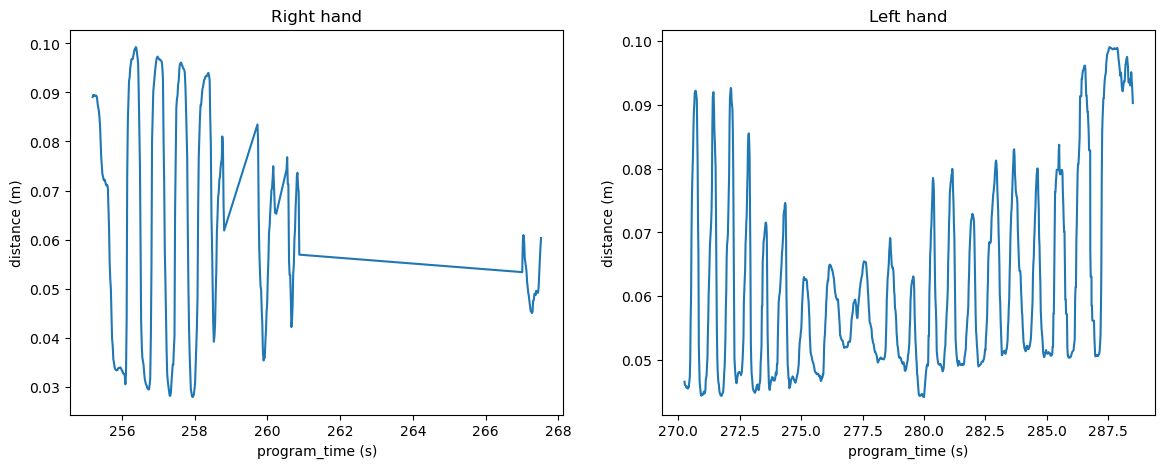

In [30]:
fig,axes = plt.subplots(1, 2, figsize = (14,5))

axes[0].plot(
    OC_r_amp_mean['program_time'],
    OC_r_amp_mean['distance']
)
axes[0].set_title('Right hand')
axes[0].set_xlabel('program_time (s)')
axes[0].set_ylabel('distance (m)')

axes[1].plot(
    OC_l_amp_mean['program_time'],
    OC_l_amp_mean['distance']
)
axes[1].set_title('Left hand')
axes[1].set_xlabel('program_time (s)')
axes[1].set_ylabel('distance (m)')

Calculating max and mean OC (mean) amplitudes

In [31]:
max_OC_r_amp_mean = np.max(OC_r_amp_mean['distance'])
max_OC_l_amp_mean = np.max(OC_l_amp_mean['distance'])

mean_OC_r_amp_mean = np.mean(OC_r_amp_mean['distance'])
mean_OC_l_amp_mean = np.mean(OC_l_amp_mean['distance'])

print(f'Maximum OC (mean) distance (right side): {max_OC_r_amp_mean}')
print(f'Maximum OC (mean) distance (left side): {max_OC_l_amp_mean} \n')
print(f'Mean OC (mean) distance (right side): {mean_OC_r_amp_mean}')
print(f'Mean OC (mean) distance (left side): {mean_OC_l_amp_mean}')

Maximum OC (mean) distance (right side): 0.09922730600241611
Maximum OC (mean) distance (left side): 0.09904238764787121 

Mean OC (mean) distance (right side): 0.0629393274867168
Mean OC (mean) distance (left side): 0.061787551349928825


# Pronation-Supination

Creating PS dataframe

In [32]:
PS_r = task(
    clean_df_VR_r,
    '10:46:59',
    '10:47:19'
    )
PS_r

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
1617,10:47:02:4006,293.6471,0.0166,0.2840,-0.1386,-0.2469,0.2608,-0.1438,-0.2251,0.2424,...,-0.1596,-0.1712,0.2578,-0.1667,-0.1840,2988.0,0.0,0.44,0.0,1.0
1618,10:47:02:4176,293.6641,0.0166,0.2772,-0.1274,-0.2203,0.2543,-0.1330,-0.1993,0.2365,...,-0.1511,-0.1463,0.2512,-0.1576,-0.1579,1653.0,0.0,0.46,0.0,1.0
1619,10:47:02:4333,293.6798,0.0167,0.2754,-0.1214,-0.2060,0.2524,-0.1267,-0.1854,0.2347,...,-0.1451,-0.1325,0.2500,-0.1520,-0.1435,2924.0,0.0,0.43,0.0,1.0
1620,10:47:02:4517,293.6982,0.0166,0.2719,-0.1098,-0.1793,0.2488,-0.1157,-0.1583,0.2309,...,-0.1342,-0.1049,0.2484,-0.1425,-0.1163,748.0,0.0,0.47,0.0,1.0
1621,10:47:02:4678,293.7143,0.0166,0.2701,-0.1052,-0.1658,0.2470,-0.1117,-0.1446,0.2293,...,-0.1305,-0.0911,0.2474,-0.1385,-0.1026,9645.0,0.0,0.43,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,10:47:16:4453,307.6918,0.0167,0.2159,-0.2388,-0.2651,0.1980,-0.2469,-0.2401,0.1852,...,-0.2869,-0.1951,0.1989,-0.2953,-0.2120,5628.0,0.0,0.52,0.0,1.0
2455,10:47:16:4622,307.7087,0.0166,0.2172,-0.2477,-0.2823,0.1986,-0.2569,-0.2580,0.1849,...,-0.2980,-0.2141,0.1993,-0.3062,-0.2315,757.0,0.0,0.46,0.0,1.0
2456,10:47:16:4787,307.7251,0.0167,0.2213,-0.2646,-0.3164,0.2019,-0.2754,-0.2937,0.1880,...,-0.3200,-0.2534,0.2023,-0.3259,-0.2699,5988.0,0.0,0.51,0.0,1.0
2457,10:47:16:5115,307.7580,0.0167,0.2276,-0.2728,-0.3663,0.2080,-0.2895,-0.3468,0.1962,...,-0.3392,-0.3131,0.2068,-0.3383,-0.3263,4196.0,0.0,942.42,0.0,1.0


In [33]:
PS_l = task(
    clean_df_VR_l,
    '10:46:59',
    '10:47:19'
    )
PS_l

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
1995,10:47:17:6092,308.8557,0.0166,-0.0773,-0.2522,-0.3174,-0.0488,-0.2579,-0.2998,-0.0259,...,-0.2785,-0.2477,-0.0274,-0.2925,-0.2685,2025.0,0.0,0.45,0.0,1.0
1996,10:47:17:6264,308.8729,0.0166,-0.0796,-0.2492,-0.3056,-0.0509,-0.2532,-0.2878,-0.0279,...,-0.2734,-0.2350,-0.0300,-0.2897,-0.2560,4709.0,0.0,0.44,0.0,1.0
1997,10:47:17:6435,308.8900,0.0167,-0.0825,-0.2424,-0.2774,-0.0541,-0.2441,-0.2586,-0.0318,...,-0.2620,-0.2048,-0.0352,-0.2807,-0.2256,4890.0,0.0,0.44,0.0,1.0
1998,10:47:17:6586,308.9051,0.0166,-0.0833,-0.2369,-0.2620,-0.0553,-0.2382,-0.2428,-0.0335,...,-0.2565,-0.1887,-0.0369,-0.2749,-0.2094,4149.0,0.0,0.44,0.0,1.0
1999,10:47:17:6772,308.9236,0.0167,-0.0845,-0.2299,-0.2333,-0.0575,-0.2287,-0.2129,-0.0366,...,-0.2448,-0.1569,-0.0402,-0.2648,-0.1780,6550.0,0.0,0.42,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,10:47:18:9240,310.1705,0.0166,-0.1181,-0.1279,-0.0114,-0.1339,-0.1281,0.0175,-0.1442,...,-0.1576,0.0726,-0.1168,-0.1532,0.0665,521.0,0.0,0.49,0.0,1.0
2074,10:47:18:9404,310.1869,0.0166,-0.1187,-0.1300,-0.0123,-0.1350,-0.1312,0.0163,-0.1457,...,-0.1613,0.0709,-0.1173,-0.1555,0.0654,2969.0,0.0,0.48,0.0,1.0
2075,10:47:18:9561,310.2026,0.0167,-0.1191,-0.1312,-0.0126,-0.1356,-0.1328,0.0160,-0.1465,...,-0.1632,0.0704,-0.1184,-0.1571,0.0650,9667.0,0.0,0.47,0.0,1.0
2076,10:47:18:9737,310.2202,0.0166,-0.1196,-0.1347,-0.0130,-0.1366,-0.1371,0.0153,-0.1480,...,-0.1688,0.0689,-0.1204,-0.1618,0.0639,9130.0,0.0,0.47,0.0,1.0


Calculating PS angle

In [44]:
importlib.reload(hp)
PS_r_ang = hp.PS_ang(
    PS_r, 
    'thumb_tip', 
    'middle_tip', 
    'palm'
    )

In [45]:
PS_l_ang = hp.PS_ang(
    PS_l, 
    'thumb_tip', 
    'middle_tip', 
    'palm'
    )

In [36]:
importlib.reload(hp)

<module 'movement_calc.helpfunctions' from 'c:\\Users\\madal\\Thesis\\code\\ultraleap-hand-tracking\\py_analysis\\preprocessing\\movement_calc\\helpfunctions.py'>

Text(0, 0.5, 'angle (deg)')

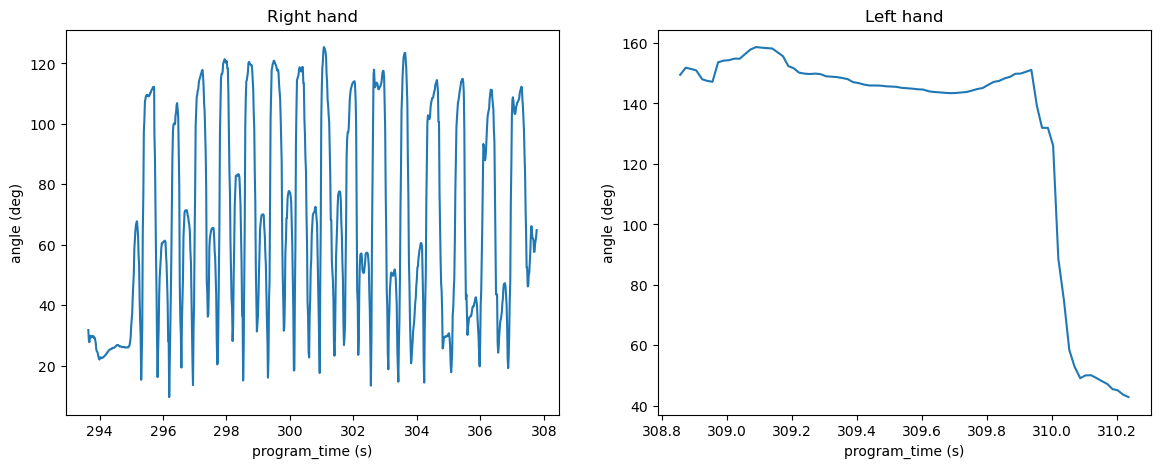

In [37]:
fig,axes = plt.subplots(1, 2, figsize = (14,5))

axes[0].plot(
  PS_r_ang['program_time'],
  PS_r_ang['angle']
  )
axes[0].set_title('Right hand')
axes[0].set_xlabel('program_time (s)')
axes[0].set_ylabel('angle (deg)')

axes[1].plot(
  PS_l_ang['program_time'],
  PS_l_ang['angle']
  )
axes[1].set_title('Left hand')
axes[1].set_xlabel('program_time (s)')
axes[1].set_ylabel('angle (deg)')

Calculating max and mean PS distances

In [38]:
max_PS_r_ang = np.max(PS_r_ang['angle'])
max_PS_l_ang = np.max(PS_l_ang['angle'])

mean_PS_r_ang = np.mean(PS_r_ang['angle'])
mean_PS_l_ang = np.mean(PS_l_ang['angle'])

print(f'Maximum PS angle (right side): {max_PS_r_ang}')
print(f'Maximum PS angle (left side): {max_PS_l_ang} \n')
print(f'Mean PS angle (right side): {mean_PS_r_ang}')
print(f'Mean PS angle (left side): {mean_PS_l_ang}')

Maximum PS angle (right side): 125.34972247182374
Maximum PS angle (left side): 158.62324272260122 

Mean PS angle (right side): 68.06509190980066
Mean PS angle (left side): 132.05110673019442


Finding Minima and Maxima

In [56]:
importlib.reload(hp)
dict_min_max_PS_r_ang = hp.find_min_max(
    PS_r_ang,
    10,
    'angle',
    90,
    )    

max_idx_PS_r_ang = dict_min_max_PS_r_ang['max_idx'] 
min_idx_PS_r_ang = dict_min_max_PS_r_ang['min_idx']

Plotting Minima Maxima

Text(0.5, 1.0, 'PS_r_ang_VR')

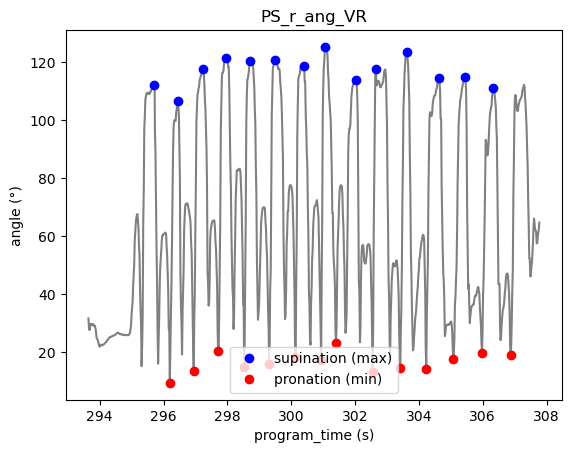

In [57]:
plt.plot(PS_r_ang['program_time'], PS_r_ang['angle'], color='grey')
plt.plot(PS_r_ang.iloc[max_idx_PS_r_ang]['program_time'], PS_r_ang.iloc[max_idx_PS_r_ang]['angle'], "o", label= "supination (max)", color='blue')
plt.plot(PS_r_ang.iloc[min_idx_PS_r_ang]['program_time'], PS_r_ang.iloc[min_idx_PS_r_ang]['angle'], "o", label= "pronation (min)", color='red')
plt.xlabel('program_time (s)')
plt.ylabel('angle (°)')
plt.legend()
plt.title('PS_r_ang_VR')


In [60]:
importlib.reload(hp)
dict_min_max_PS_l_ang = hp.find_min_max(
    PS_l_ang,
    10,
    'angle',
    90,
    )    

max_idx_PS_l_ang = dict_min_max_PS_l_ang['max_idx'] 
min_idx_PS_l_ang = dict_min_max_PS_l_ang['min_idx']

Text(0.5, 1.0, 'PS_l_ang_VR')

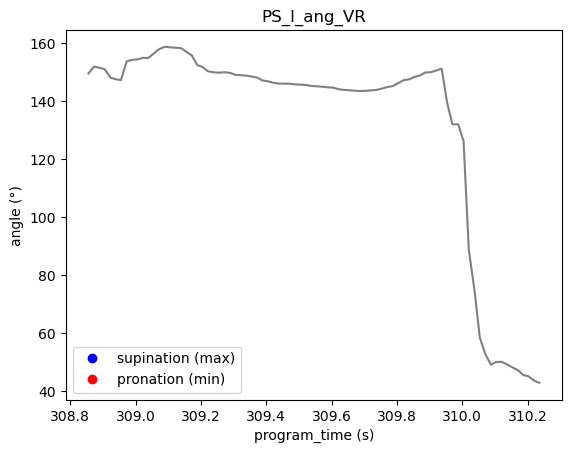

In [61]:
plt.plot(PS_l_ang['program_time'], PS_l_ang['angle'], color='grey')
plt.plot(PS_l_ang.iloc[max_idx_PS_l_ang]['program_time'], PS_l_ang.iloc[max_idx_PS_l_ang]['angle'], "o", label = "supination (max)", color = 'blue')
plt.plot(PS_l_ang.iloc[min_idx_PS_l_ang]['program_time'], PS_l_ang.iloc[min_idx_PS_l_ang]['angle'], "o", label = "pronation (min)", color = 'red')
plt.xlabel('program_time (s)')
plt.ylabel('angle (°)')
plt.legend()
plt.title('PS_l_ang_VR')


Pronation Supination Speed - NOT FINISHED!!!!

In [62]:
def speed_PS(
    df,
    max_idx,
    min_idx
    ):
    """

    """
    speed_P = []
    speed_S = []

    for i, (max, min) in enumerate(zip(max_idx, min_idx)):
        ## Still have to try to generalize ...
        # if min_idx[0] <= max_idx[0]:

        delta_ang_P = df.iloc[min]['angle']-df.iloc[max]['angle']
        delta_ang_S = df.iloc[max]['angle']-df.iloc[min]['angle']
        delta_time_P = df.iloc[min]['program_time']-df.iloc[max]['program_time']
        delta_time_S = df.iloc[max]['program_time']-df.iloc[min]['program_time']

        vel_P = delta_ang_P/delta_time_P
        vel_S = delta_ang_S/delta_time_S

        speed_P.append(vel_P)
        speed_S.append(vel_S)

    dict_speed = {'speed_P': speed_P, 'speed_S': speed_S}

    return dict_speed